In [48]:
import mat73 # scipy cannot read v7.3 mat files grrr

In [49]:
dataset = mat73.loadmat('IR_P_G_ALL.mat')
data = dataset['Data']
print(data)

[[ 3.85731  4.31115  3.30899 ...  4.02891  4.30344  2.57333]
 [ 5.93218  5.81761  5.10073 ...  5.0095   5.9533   5.53275]
 [ 3.07467  2.5465   3.35579 ...  3.46069  2.81486  2.95416]
 ...
 [ 4.42012  4.61513  4.9956  ...  4.57884  4.6587   4.48902]
 [ 8.83048  8.95853  9.05849 ...  8.60897  8.73814  9.05038]
 [ 9.8037   9.91875  9.71653 ... 10.64682 10.8741  10.40309]]


In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=data.shape[1])
pca.fit(data)

import numpy as np

cov_mat = np.cov(data.T)


Load = pca.components_
Score = pca.score_samples(data)
Eigval = np.linalg.eigvals(cov_mat)

Let's normalize the eigenvalues and plot them in a bar plot

<BarContainer object of 36 artists>

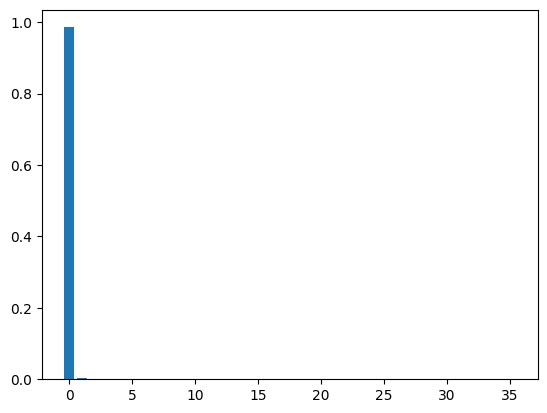

In [51]:
Eigval = Eigval / np.sum(Eigval)

from matplotlib import pyplot as plt

plt.bar(np.arange(Eigval.shape[0]), Eigval)

As we can see, the first eigenvalue is way bigger than the others.
In order to see also the other eigenvalues we can change the plot's scaling, e.g. with a square root.

<BarContainer object of 36 artists>

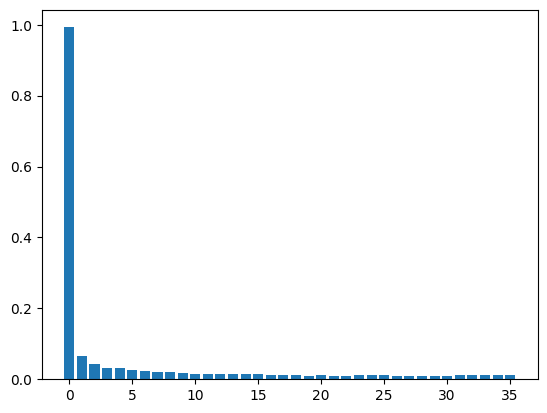

In [52]:
plt.bar(np.arange(Eigval.shape[0]), np.sqrt(Eigval))

The first eigenvalue is not really relevant for our analysis, it gives us info about the shape of the distribution.
What about other eigenvalues?

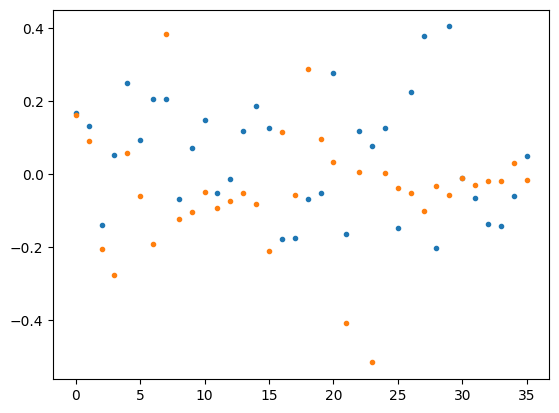

In [53]:
plt.plot(Load[:,1], '.')
plt.plot(Load[:,2], '.')

In [54]:
import seaborn as sns

sns.histplot(Score, bins=100, kde=True)

TypeError: object of type 'numpy.float64' has no len()